In [7]:
import pandas as pd

file_path = r"C:\Users\ramim\Downloads\48a84ba8-194c-47f9-a5c0-d4098a43151d.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

data_filtered = data[["Tract", "2021"]].copy()  # Create a copy to avoid SettingWithCopyWarning

data_filtered.rename(columns={"Tract": "Neighborhood_Tract", "2021": "Median_Price_2021"}, inplace=True)

data_filtered = data_filtered[(data_filtered["Median_Price_2021"] > 0)].dropna()

most_affordable = data_filtered.loc[data_filtered["Median_Price_2021"].idxmin()]

print("The most affordable neighborhood tract is:")
print(f"Tract ID: {most_affordable['Neighborhood_Tract']}")
print(f"Median Housing Price in 2021: ${most_affordable['Median_Price_2021']}")


The most affordable neighborhood tract is:
Tract ID: 42003130400.0
Median Housing Price in 2021: $4500.0


In [ ]:
- We analyzed the dataset to determine which neighborhood tract has the most affordable housing in 2021.
- The tract with the lowest median housing price is Tract ID: 42003130400.0
- The median price in this tract was  $4500.0


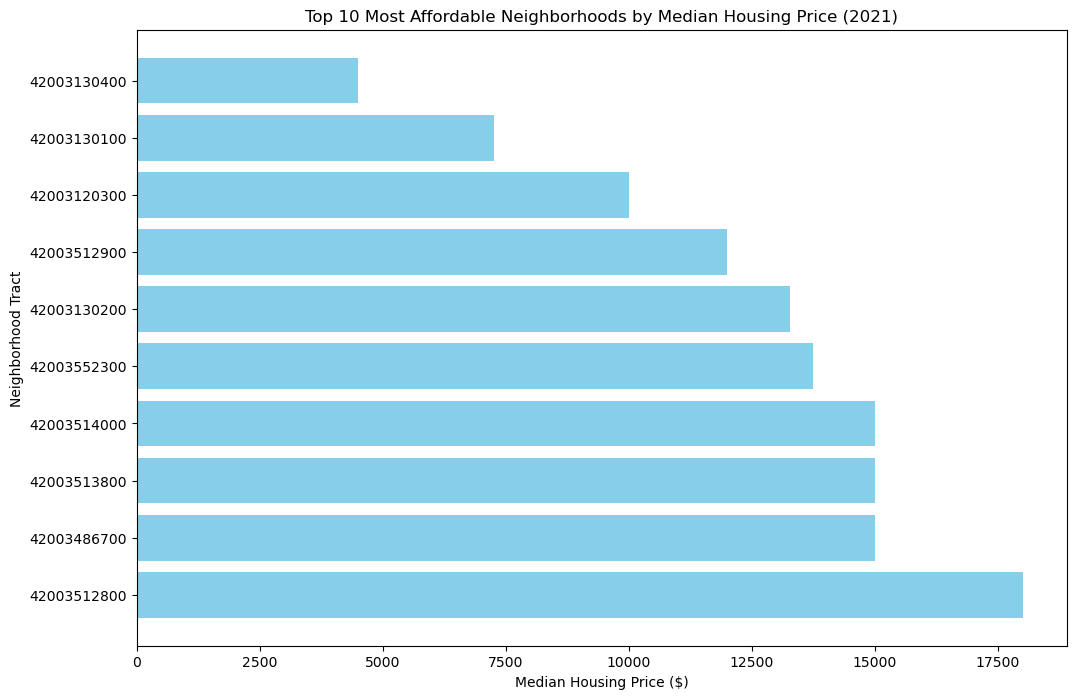

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\ramim\Downloads\48a84ba8-194c-47f9-a5c0-d4098a43151d.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Extract relevant columns: Tract and 2021 median price
data_filtered = data[["Tract", "2021"]].copy()  # Create a copy to avoid SettingWithCopyWarning
data_filtered.rename(columns={"Tract": "Neighborhood_Tract", "2021": "Median_Price_2021"}, inplace=True)

# Drop rows with missing or zero prices for accurate analysis
data_filtered = data_filtered[(data_filtered["Median_Price_2021"] > 0)].dropna()

# Sort data by affordability (lowest price first)
sorted_data = data_filtered.sort_values(by="Median_Price_2021")

# Select the top 10 most affordable neighborhoods
top_10_affordable = sorted_data.head(10)

# Plot the top 10 most affordable neighborhoods
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.barh(top_10_affordable["Neighborhood_Tract"].astype(str), top_10_affordable["Median_Price_2021"], color='skyblue')
plt.xlabel("Median Housing Price ($)")
plt.ylabel("Neighborhood Tract")
plt.title("Top 10 Most Affordable Neighborhoods by Median Housing Price (2021)")
plt.gca().invert_yaxis()  # Invert y-axis for better ranking visualization
plt.show()
